# Comparison with APL library on OpenML benchmark datasets

In this notebook we will compare our library with official SAP HANA Automated Predictive Library (details here: https://help.sap.com/viewer/cb31bd99d09747089754a0ba75067ed2/2.5.0.0/en-US). In most cases, our library beats it in accuracy. However, there is always room for improvement. 

In [1]:
from hana_automl.utils.perfomance import Benchmark
from tests.connection import connection_context
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hana_automl.utils.cleanup import clean
%load_ext jupyternotify
import time

ModuleNotFoundError: No module named 'hana_automl'

In [2]:
b = Benchmark(connection_context)
GRADIENT = True

In [3]:
df = pd.DataFrame()

In [4]:
def plot_results(task: str, boosting: bool):
    df['APL'] = apl_acc
    df['HANA AutoML'] = hana_acc
    df['Dataset'] = datasets
    x = np.arange(len(datasets))  # the label locations
    width = 0.45  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, apl_acc, width, label='APL')
    rects2 = ax.bar(x + width/2, hana_acc, width, label='HANA AutoML')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    if boosting:
        ax.set_title(f'{task} (APL with Gradient Boosting)')
    else:
        ax.set_title(f'{task} (APL without Gradient Boosting)')
    
    ax.set_xticks(x)
    ax.set_xticklabels(datasets)
    ax.legend()

    ax.bar_label(rects1)
    ax.bar_label(rects2)

    plt.gcf().set_size_inches(25,15)
    plt.style.use('default')
    plt.show()
    
def finish(benchmark):
    apl_acc.append(benchmark.apl_accuracy)
    hana_acc.append(benchmark.automl_accuracy)
    clean()
    time.sleep(180)
    
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Enable Gradient boosting in APL by setting GRADIENT to True
Don't know what is Gradient Boosting? Check here: https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/ . We are using special benchmark datasets from OpenML to compare model accuracy.

## Classification

In [24]:
apl_acc = []
hana_acc = []
datasets = ['kr-vs-kp.csv', 'australian.csv', 'phoneme.csv', 'adult.csv', 'blood.csv', 'sylvine.csv', 'credit.csv', 'kc1.csv']

In [ ]:
clean()
b.run('./data/benchmark/cls/kr-vs-kp.csv', task='cls', label='class', categorical=['class'], grad_boost=GRADIENT)
finish(b)

In [ ]:
b.run('./data/benchmark/cls/australian.csv', task='cls', 
      label='A15', 
      categorical=['A15', 'A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12'],
      grad_boost=GRADIENT)
finish(b)

In [ ]:
b.run('./data/benchmark/cls/phoneme.csv', task='cls', label='Class', categorical=['Class'], grad_boost=GRADIENT)
finish(b)

In [31]:
b.run('./data/benchmark/cls/adult.csv', task='cls', label='class', categorical=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'class'], grad_boost=GRADIENT)
finish(b)

100%|██████████| 1/1 [00:01<00:00,  1.81s/it]


Finished in 11 seconds
APL accuracy:  0.8757933528970177
REMOVED ALL TABLES FROM DEVELOPER
Recreating table BENCHMARK_AUTOML with data from dataframe


100%|██████████| 1/1 [00:06<00:00,  6.75s/it]


Task: cls
All iterations completed successfully!
Starting model accuracy evaluation on the validation data!
Finished in 442 seconds


100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


hana_automl accuracy: 0.868013
REMOVED ALL TABLES FROM DEVELOPER


In [33]:
b.run('./data/benchmark/cls/blood.csv', task='cls', label='Class', categorical=['Class'], grad_boost=GRADIENT)
finish(b)

100%|██████████| 1/1 [00:00<00:00,  6.27it/s]


Finished in 6 seconds
APL accuracy:  0.7866666666666666
REMOVED ALL TABLES FROM DEVELOPER
Recreating table BENCHMARK_AUTOML with data from dataframe


100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


Task: cls
All iterations completed successfully!
Starting model accuracy evaluation on the validation data!
Finished in 303 seconds


100%|██████████| 1/1 [00:00<00:00,  6.31it/s]


hana_automl accuracy: 0.782222
REMOVED ALL TABLES FROM DEVELOPER


In [35]:
b.run('./data/benchmark/cls/sylvine.csv', task='cls', label='class', categorical=['class'], grad_boost=GRADIENT)
finish(b)

100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


Finished in 7 seconds
APL accuracy:  0.9460338101430429
REMOVED ALL TABLES FROM DEVELOPER
Recreating table BENCHMARK_AUTOML with data from dataframe


100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


Task: cls
All iterations completed successfully!
Starting model accuracy evaluation on the validation data!
Finished in 344 seconds


100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


hana_automl accuracy: 0.931729
REMOVED ALL TABLES FROM DEVELOPER


In [36]:
b.run('./data/benchmark/cls/credit.csv', task='cls', label='class', categorical=['class', 'checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker'], grad_boost=GRADIENT)
finish(b)

100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


Finished in 7 seconds
APL accuracy:  0.7866666666666666
REMOVED ALL TABLES FROM DEVELOPER
Recreating table BENCHMARK_AUTOML with data from dataframe


100%|██████████| 1/1 [00:00<00:00,  2.45it/s]


Task: cls
All iterations completed successfully!
Starting model accuracy evaluation on the validation data!
Finished in 322 seconds


100%|██████████| 1/1 [00:00<00:00,  3.11it/s]


hana_automl accuracy: 0.743333
REMOVED ALL TABLES FROM DEVELOPER


In [37]:
b.run('./data/benchmark/cls/kc1.csv', task='cls', label='defects', categorical=['defects'], grad_boost=GRADIENT)
finish(b)

100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


Finished in 6 seconds
APL accuracy:  0.8499210110584519
REMOVED ALL TABLES FROM DEVELOPER
Recreating table BENCHMARK_AUTOML with data from dataframe


100%|██████████| 1/1 [00:00<00:00,  1.49it/s]


Task: cls
All iterations completed successfully!
Starting model accuracy evaluation on the validation data!
Finished in 348 seconds


100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


hana_automl accuracy: 0.846761
REMOVED ALL TABLES FROM DEVELOPER


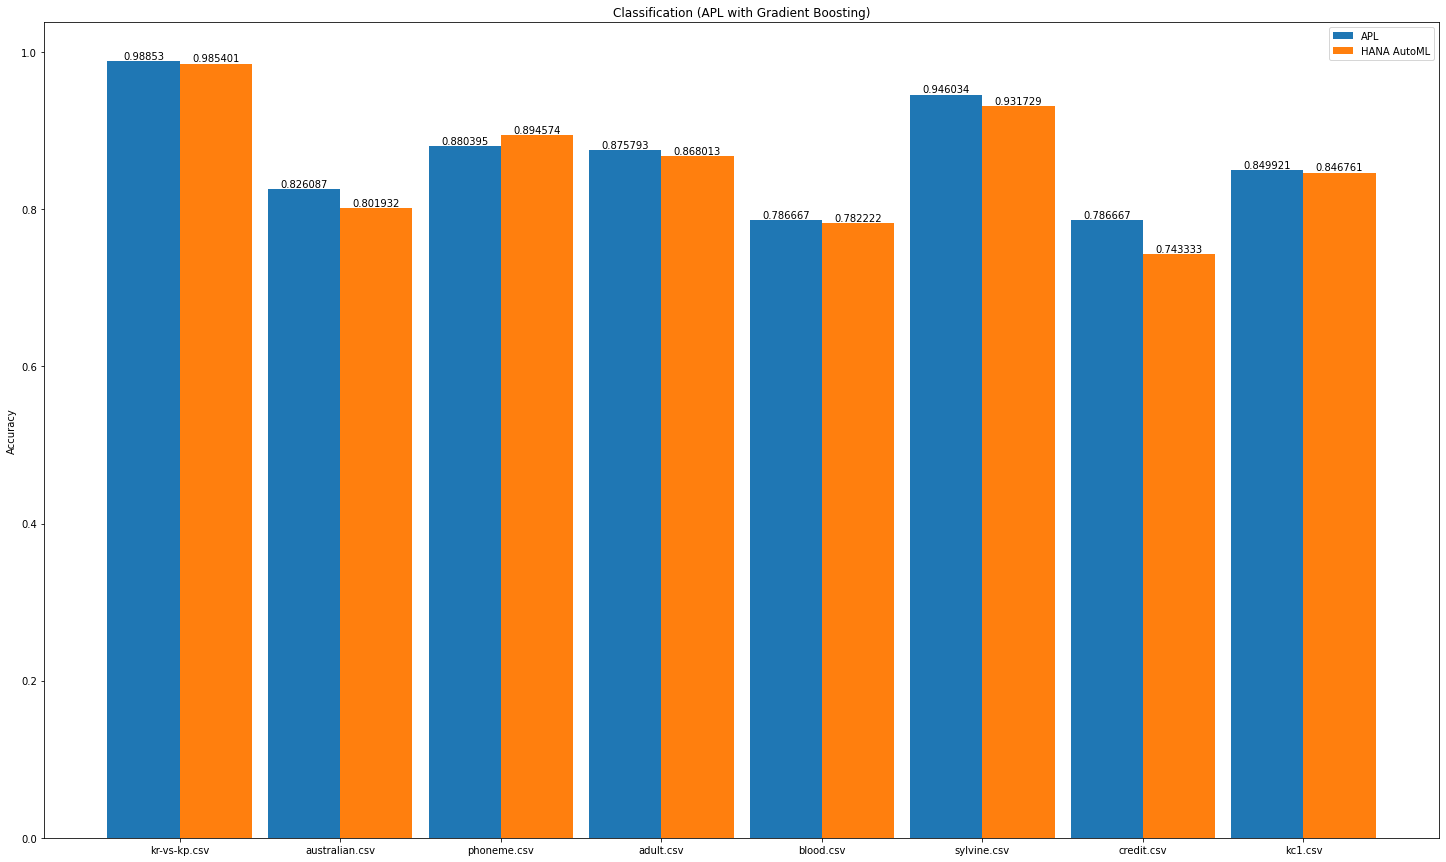

In [43]:
hana_acc = [0.985401, 0.801932, 0.894574, 0.868013, 0.782222, 0.931729, 0.743333, 0.8467610]
apl_acc = [0.9885297184567258, 0.8260869565217391, 0.8803945745992602, 0.8757933528970177, 0.7866666666666666, 0.9460338101430429, 0.7866666666666666, 0.8499210110584519]
plot_results(task='Classification', boosting=GRADIENT)

## Regression

In [5]:
datasets = ['elevators.csv', 'wine_quality.csv', 'baseball.csv', 'boston.csv', 'tecator.csv', 'space_ga.csv', 'pol.csv', 'socmob.csv']
hana_acc = []
apl_acc = []
clean()

REMOVED ALL TABLES FROM DEVELOPER


In [ ]:
%%notify
clean()
b.run('./data/benchmark/reg/elevators.csv', task='reg', label='Goal', grad_boost=GRADIENT)
finish(b)

REMOVED ALL TABLES FROM DEVELOPER


100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Finished in 9 seconds
APL accuracy:  0.9051122074476603
REMOVED ALL TABLES FROM DEVELOPER
Recreating table BENCHMARK_AUTOML with data from dataframe


100%|██████████| 1/1 [00:01<00:00,  1.93s/it]


Task: reg


In [ ]:
%%notify
b.run('./data/benchmark/reg/wine_quality.csv', task='reg', label='quality', grad_boost=GRADIENT)
finish(b)

In [ ]:
%%notify
b.run('./data/benchmark/reg/baseball.csv', task='reg', label='RS', grad_boost=GRADIENT)
finish(b)

In [ ]:
%%notify
b.run('./data/benchmark/reg/boston.csv', task='reg', label='MEDV', grad_boost=GRADIENT)
finish(b)

In [ ]:
%%notify
b.run('./data/benchmark/reg/tecator.csv', task='reg', label='fat', grad_boost=GRADIENT)
finish(b)

In [ ]:
%%notify
b.run('./data/benchmark/reg/space_ga.csv', task='reg', label='ln(VOTES/POP)', grad_boost=GRADIENT)
finish(b)

In [ ]:
%%notify
b.run('./data/benchmark/reg/pol.csv', task='reg', label='foo', grad_boost=GRADIENT)
finish(b)

In [ ]:
%%notify
b.run('./data/benchmark/reg/socmob.csv', task='reg', label='counts_for_sons_current_occupation', categorical=['fathers_occupation','sons_occupation', 'family_structure', 'race'],grad_boost=GRADIENT)
finish(b)

In [ ]:
hana_acc = [0.8753186740608836, 0.38712821265860387, 0.9366921697454966, 0.8272694767533825, 0.9943877154701021, 0.7081623532908919, 0.980216625155045, 0.9376376904944593]
apl_acc = [0.8382246438752253, 0.17297255051855154, 0.9337722036910887, 0.7792124816136172, 0.9930549624241458, 0.7075101327273563, 0.8782178100191081, 0.6624122582210749]

print('APL ACCURACY', apl_acc)
print('AutoML ACCURACY', hana_acc)
print(len(datasets), len(hana_acc), len(apl_acc))
plot_results(task='Regression', boosting=False)